<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Изучение-моделей-без-учёта-дисбаланса" data-toc-modified-id="Изучение-моделей-без-учёта-дисбаланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение моделей без учёта дисбаланса</a></span></li><li><span><a href="#Изучение-моделей-с-учетом-дисбаланса" data-toc-modified-id="Изучение-моделей-с-учетом-дисбаланса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение моделей с учетом дисбаланса</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import os
os.chdir("C:/Users/Admin/Downloads/ЯНДЕКС/Проекты из курса/6 отток клиентов банка")
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [2]:
#pip install --upgrade ipykernel

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Целевой признак
Exited — факт ухода клиента.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропущены значения в столбце 'Tenure' — сколько лет человек является клиентом банка. 

In [5]:

data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [6]:
print('Кол-во пропущенных значений:', data.Tenure.isna().sum(), 
      'Процент пропущенных значений:', data.Tenure.isna().sum()/len(data))

Кол-во пропущенных значений: 909 Процент пропущенных значений: 0.0909


In [7]:
data['Tenure'] = data['Tenure'].fillna(0)

Столбцы 'CustomerId', 'Surname', 'RowNumber' нам не понадобятся, убираем их из данных

In [8]:
data = data.drop(columns=['CustomerId', 'Surname', 'RowNumber'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Совместим кодирование категориальных и масштабирование численных признаков. Разделим данные на три выборки:**

In [9]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop(['Exited'], axis=1)
#features_train, features_valid, target_train, target_valid = train_test_split(
    #features, target, test_size=0.25, random_state=12345)
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.50, random_state=12345)

numeric = ['CreditScore', 'Age','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Tenure']
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape) 
print(features_valid.shape) 
print(features_test.shape) 
data_ohe.head()

(6000, 11)
(2000, 11)
(2000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


## Исследование задачи

Accuracy для решающего дерева
Подходит ли нам метрика accuracy? Обучим модель и проверим.
Вычислим правильность модели функцией accuracy_score(). Она принимает на вход верные ответы и предсказания, а возвращает долю правильных ответов.

In [10]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) # получение предсказания модели
accuracy_valid  = accuracy_score(target_valid, predicted_valid)
print(accuracy_valid)

0.7865


Проверка адекватности модели. Доля правильных ответов — 81,92%. Это много или мало? Исследуем целевой признак.
Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0». Количество уникальных значений подсчитывается методом value_counts(). Он группирует строго одинаковые величины.


0    0.7963
1    0.2037
Name: Exited, dtype: float64


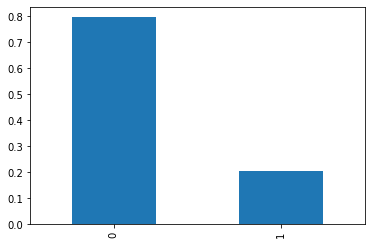

In [11]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar')

Проанализируем частоты классов в результатах предсказаний решающего дерева (переменная predicted_valid):

0    0.7985
1    0.2015
dtype: float64


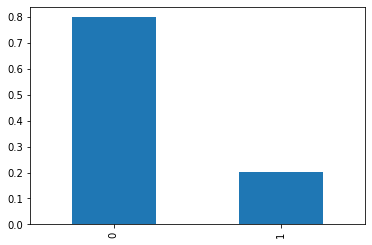

In [12]:
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Мало что изменилось. Попробуем константную модель:

In [13]:
target_pred_constant = pd.Series(0, index=target.index)


accuracy = accuracy_score(target, target_pred_constant)
print(accuracy)
# < напишите код здесь >

0.7963


In [14]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features, target)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(features)
dummy_clf.score(features, target)

0.7963

## Борьба с дисбалансом

Справиться с дисбалансом и более точно классифицировать ответы помогут новые метрики.

In [15]:
predicted_train = model.predict(features_train)

Матрица ошибок
TP, FP, TN, FN собираются в одну таблицу — матрицу ошибок, или матрицу неточностей (англ. сonfusion matrix).

In [16]:
print(confusion_matrix(target_train, predicted_train))

[[4804    0]
 [   0 1196]]


**Полнота Recall**


Матрица ошибок поможет построить новые метрики. Начнём с полноты (англ. recall).
Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит.

In [17]:
print(recall_score(target_train, predicted_train))

1.0


**Точность Precision**

Ещё одна метрика для оценки качества прогноза целевого класса — точность (англ. precision).
Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.

In [18]:
print(precision_score(target_train, predicted_train))

1.0


**F1-мера**


По отдельности полнота и точность не слишком информативны. Нужно одновременно повышать показатели обеих. Или обратиться к новой метрике, которая их объединит.


Полнота и точность оценивают качество прогноза положительного класса с разных позиций. Recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. Precision выявляет, не переусердствует ли модель, присваивая положительные метки.


Важны обе метрики. Контролировать их параллельно помогают агрегирующие метрики, одна из которых — F1-мера (англ. F1-score). Это среднее гармоническое полноты и точности. Единица в F1 означает, что соотношение полноты и точности равно 1:1.

In [19]:
print(f1_score(target_train, predicted_train))

1.0


In [20]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4653465346534654


### Изучение моделей без учёта дисбаланса

Модель Решающего дерева:

In [21]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.47990255785627284


Модель Случайного леса:

In [22]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5766871165644172


Модель Логистической регрессии:

In [23]:
model3 = LogisticRegression(random_state=12345, solver='liblinear') 
model3.fit(features_train, target_train)
predicted_valid3 = model3.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid3))

F1: 0.33389544688026984


**Без учета дисбаланса наилучший показатель F1 демонстирует модель Случайного леса.**

### Изучение моделей с учетом дисбаланса

**Техника Взвешивания классов**

Модель Решающего дерева:

In [24]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5304518664047152


Модель Случайного леса:

In [25]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10, class_weight='balanced') #  class_weight='balanced' инициализируйте модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6239620403321471


Модель Логистической регрессии:

In [26]:
model3 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model3.fit(features_train, target_train)
predicted_valid3 = model3.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid3))

F1: 0.4888888888888888


**С учетом дисбаланса и применением техники class_weight наилучший показатель F1 все так же демонстирует модель Случайного леса.**

Увеличение выборки

In [27]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6129032258064516


Уменьшение выборки

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

# < напишите код здесь >
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)


print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5150214592274679


**Техники уменьшения и увеличения выборки только ухудшают результат. Улучшает результат техника Взвешивания классов**

**Изменение порога**

Данная техника мне так и осталась непонятна. По аналогии с тренажером выполнила данный пункт, но даже дальнейшая его интерпретация мне непонятна :(

In [29]:
from sklearn.metrics import precision_score, recall_score

model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1: {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.209, Полнота = 1.000, F1: 0.346
Порог = 0.02 | Точность = 0.210, Полнота = 1.000, F1: 0.347
Порог = 0.04 | Точность = 0.217, Полнота = 0.993, F1: 0.356
Порог = 0.06 | Точность = 0.229, Полнота = 0.990, F1: 0.371
Порог = 0.08 | Точность = 0.239, Полнота = 0.974, F1: 0.384
Порог = 0.10 | Точность = 0.253, Полнота = 0.959, F1: 0.400
Порог = 0.12 | Точность = 0.265, Полнота = 0.950, F1: 0.414
Порог = 0.14 | Точность = 0.280, Полнота = 0.938, F1: 0.432
Порог = 0.16 | Точность = 0.295, Полнота = 0.931, F1: 0.448
Порог = 0.18 | Точность = 0.310, Полнота = 0.921, F1: 0.464
Порог = 0.20 | Точность = 0.328, Полнота = 0.911, F1: 0.483
Порог = 0.22 | Точность = 0.341, Полнота = 0.892, F1: 0.494
Порог = 0.24 | Точность = 0.361, Полнота = 0.878, F1: 0.511
Порог = 0.26 | Точность = 0.381, Полнота = 0.871, F1: 0.530
Порог = 0.28 | Точность = 0.395, Полнота = 0.849, F1: 0.540
Порог = 0.30 | Точность = 0.414, Полнота = 0.835, F1: 0.553
Порог = 0.32 | Точность = 0.431, Полнота

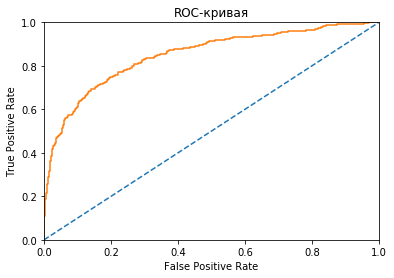

0.8487757003127288


In [30]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0]) 

plt.xlabel("False Positive Rate")  
plt.ylabel("True Positive Rate") 

plt.title("ROC-кривая") 

plt.show()

from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

## Тестирование модели

Тестирование модели Случайного леса на тестовой выборке:

In [31]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10, class_weight='balanced') # инициализируйте модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
model.fit(features_train, target_train)

predicted_test = model.predict(features_test)

print("F1:", f1_score(target_test, predicted_test))

F1: 0.6028708133971291


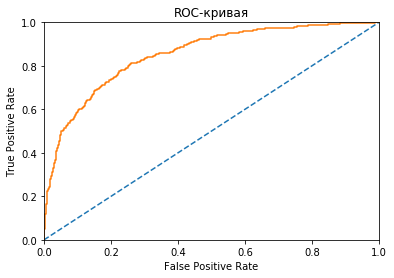

0.852940691470623


In [32]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0]) 

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate") 

plt.title("ROC-кривая") 

plt.show()

from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

Из условия:
Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

По результатам работы:
**Достигнутое значение на тестовых данных F1: 0.6028 - соответвует требованию**